# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [318]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [319]:
n = 16
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

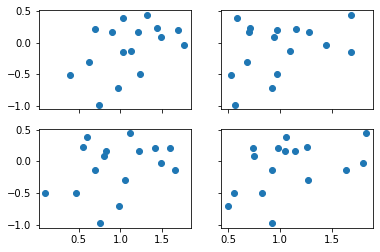

In [320]:
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')
axes[0, 0].scatter(x.T[0], y)
axes[0, 1].scatter(x.T[1], y)
axes[1, 0].scatter(x.T[2], y)
axes[1, 1].scatter(x.T[3], y)

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [321]:
betaleft = np.linalg.inv(np.dot(x.T, x))
betaright = np.dot(y.T, x)
betan = np.dot(betaleft, betaright)
betan

array([ 0.34200792, -0.02098816,  0.07695451,  0.26942561, -0.80597419])

In [322]:
predy = np.dot(x, betan)
predy

array([-0.25991605, -0.52373416, -0.28269003, -0.14251852, -0.18546523,
       -0.1471394 , -0.13332867,  0.05037535, -0.28666849, -0.05505353,
       -0.13639595, -0.05067035,  0.07634351,  0.36465758,  0.13987046,
        0.18777258])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

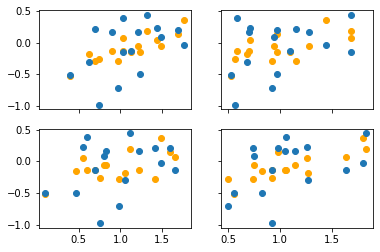

In [323]:
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')
axes[0, 0].scatter(x.T[0], predy, c='orange')
axes[0, 0].scatter(x.T[0], y)
axes[0, 1].scatter(x.T[1], predy, c='orange')
axes[0, 1].scatter(x.T[1], y)
axes[1, 0].scatter(x.T[2], predy, c='orange')
axes[1, 0].scatter(x.T[2], y)
axes[1, 1].scatter(x.T[3], predy, c='orange')
axes[1, 1].scatter(x.T[3], y)

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [324]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [325]:
columns = ['Age', 'Education', 'Cards', "Balance"]
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[ 34.,  11.,   2., 333.,   1.],
       [ 82.,  15.,   3., 903.,   1.],
       [ 71.,  11.,   4., 580.,   1.],
       ...,
       [ 67.,  12.,   5., 138.,   1.],
       [ 44.,  13.,   1.,   0.,   1.],
       [ 64.,   7.,   5., 966.,   1.]])

In [326]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

In [327]:
betaleft = np.linalg.inv(np.dot(X.T, X))
betaright = np.dot(y.T, X)
betan = np.dot(betaleft, betaright)
betan

array([  0.92242334,  -1.23393429,  -3.07886434,   0.29130137,
       177.81207395])

In [328]:
predy = np.dot(X, betan)
predy

array([286.44681807, 488.75031808, 386.37019153, 469.02396503,
       311.05693755, 559.47174828, 250.11097568, 494.81456237,
       288.52962946, 576.20693637, 585.7552648 , 207.8676263 ,
       278.09927968, 523.72332606, 267.90755306, 202.64459718,
       214.9355021 , 320.91258154, 449.00517551, 506.41939979,
       229.79216057, 502.15053382, 212.50396199, 316.54746159,
       202.64459718, 361.19860668, 375.62939971, 328.53576368,
       719.16280108, 463.02770564, 454.07392479, 182.33900742,
       353.11404075, 180.82997402, 177.43984883, 321.02228743,
       445.54476959, 542.58854502, 330.8988849 , 291.78310506,
       215.67632995, 550.47835423, 328.64416772, 463.90642718,
       498.15065059, 490.31690277, 572.4514911 , 430.51126685,
       207.24435432, 457.40805063, 385.77630657, 233.34567892,
       366.26347688, 492.81262568, 203.90283381, 217.12827155,
       317.32386984, 246.92213612, 312.25045269, 373.9170521 ,
       363.07164116, 242.11966329, 234.04340267, 252.44

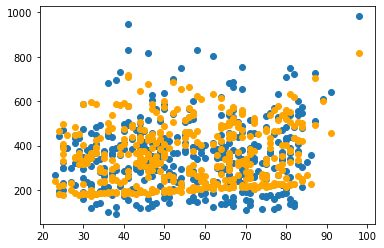

In [329]:
plt.scatter(X.T[0], y)
plt.scatter(X.T[0], predy, c='orange')

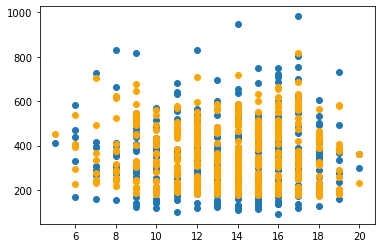

In [330]:
plt.scatter(X.T[1], y)
plt.scatter(X.T[1], predy, c='orange')

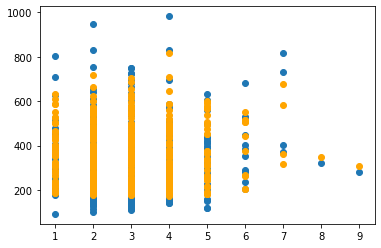

In [331]:
plt.scatter(X.T[2], y)
plt.scatter(X.T[2], predy, c='orange')

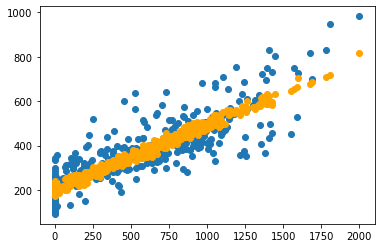

In [332]:
plt.scatter(X.T[3], y)
plt.scatter(X.T[3], predy, c='orange')

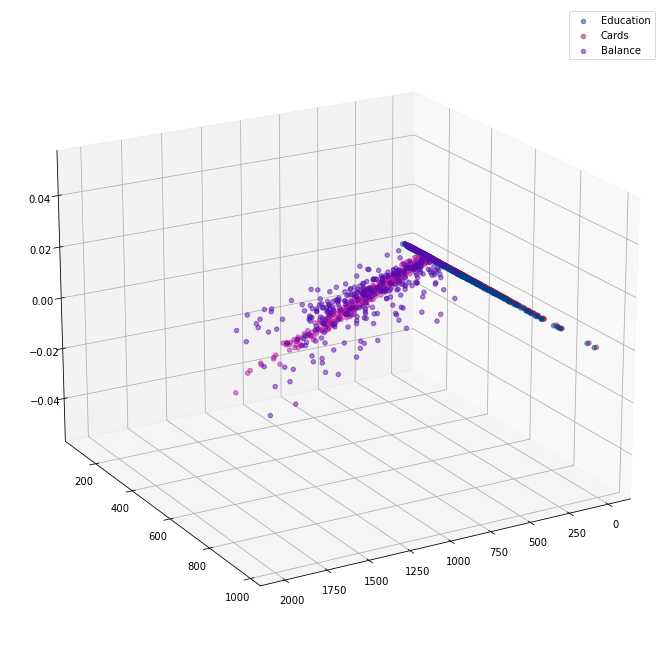

In [333]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 60)
ax.scatter(X.T[1], y, zdir='z', c='#023e8a', label='Education', alpha=0.5)
ax.scatter(X.T[1], predy, zdir='z', c='#90e0ef', alpha=0.5)
ax.scatter(X.T[2], y, zdir='z', c='#a4133c', label='Cards', alpha=0.5)
ax.scatter(X.T[2], predy, zdir='z', c='#ff4d6d', alpha=0.5)
ax.scatter(X.T[3], y, zdir='z', c='#560bad', label='Balance', alpha=0.5)
ax.scatter(X.T[3], predy,  zdir='z', c='#b5179e',alpha=0.5)

ax.legend()
